In [41]:
import struct
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from skimage.transform import downscale_local_mean
from tensorflow.contrib.slim import fully_connected as fc
np.random.seed(42)

In [2]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [3]:
def feedforward(X,W1,W2,b1,b2):
    a1 = sigmoid(np.dot(W1, X) + b1) 
    a2 = sigmoid(np.dot(W2, a1) + b2) 
#     print(a1.shape)
    return X,a1,a2

def back_prop(X,y,a1,a2,W2):
    dz2 = a2-y
    dw2 = np.dot(dz2,np.transpose(a1))
    
    dz1 = np.multiply(np.dot(np.transpose(W2),dz2),a1 * (1-a1))
    dw1 = np.dot(dz1,np.transpose(X))
    
    db1 = np.sum(dz1,axis = 1,keepdims = True)
    db2 = np.sum(dz2,axis = 1,keepdims = True)
    
    dw1 = dw1/X.shape[1]
    dw2 = dw2/X.shape[1]
    
    db1 = db1/X.shape[1]
    db2 = db2/X.shape[1]
    
    
    return dw1,dw2,db1,db2
    

### Can change learning rate,maximum iterations.

In [4]:
np.random.seed(42)
def NN(X,y,number_of_input_nodes = 2,number_of_hidden_nodes = 2,number_of_output_nodes = 1,learning_rate = 0.09,max_iters = 20000):
    W1 = np.random.normal(0,1,size=(number_of_hidden_nodes,number_of_input_nodes))
    W2 = np.random.normal(0,1,size=(number_of_output_nodes,number_of_hidden_nodes))
    
    b1 = np.random.normal(0,1,size=(number_of_hidden_nodes,1))
    b2 = np.random.normal(0,1,size=(number_of_output_nodes,1))
    
    cost_list = []
    
    for i in range(max_iters):
        
        # Forward
        a0,a1,a2 = feedforward(X,W1,W2,b1,b2)
        # Backprop
        dw1,dw2,db1,db2 = back_prop(X,y,a1,a2,W2)
        
        #Cost
        classify_loss = np.multiply(y,np.log(a2)) + np.multiply((1-y),np.log(1 - a2))
        cost = -np.sum(classify_loss)/X.shape[1]
        
        #update
        W1 = W1 - learning_rate*dw1
        W2 = W2 - learning_rate*dw2
        b1 = b1 - learning_rate*db1
        b2 = b2 - learning_rate*db2
        
        cost_list.append(cost)
    return W1,W2,b1,b2,cost_list

In [5]:
# Function adds noise to data
def input_with_noise(X):
    noise = s = np.random.normal(0, 1, 1)
    return X+noise

In [6]:
# Xor

# Function to generate data
def generate_data_Xor(N ,Best_data = False):
    X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
    Y = np.array([[0, 1, 1, 0]]) 
    
    if Best_data:
        idx = np.arange(N)%4
    else:
        idx = np.random.randint(4, size=N)
    return X.T[idx,:].T,Y[0][idx]

### Tune max_iters

Text(0.5, 1.0, 'Cost Function')

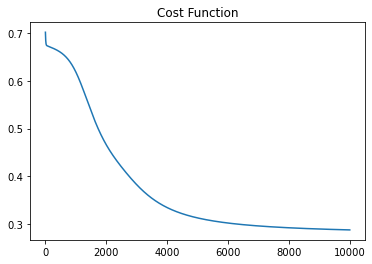

In [7]:
# Set Layer structure
number_of_input_nodes = 2
number_of_hidden_nodes = 2
number_of_output_nodes = 1

# Generate training data
# Numbers of examples in training set
X,y = generate_data_Xor(N = 5,Best_data = True)

# Training:
max_iters = 10000
W1,W2,b1,b2,c = NN(X,y,number_of_input_nodes=2,number_of_hidden_nodes=2,number_of_output_nodes=1,max_iters=max_iters)
x = []
for i in range(max_iters):
    x.append(i)
plt.plot(x,c)
plt.title("Cost Function")

### Note

In [8]:
# Note: Here Xor is not trained well and i got to know that implementing XOR using single hidden
# layer and sigmoid activation will not gaurentee that cost converges to 0 and our neural-net learns XOR

Text(0.5, 1.0, 'Error')

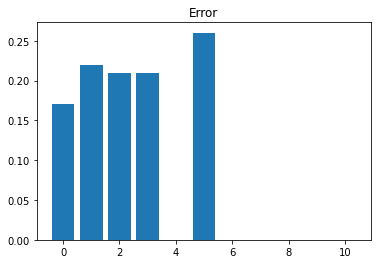

In [9]:
def testing(number_of_samples,W1,W2,b1,b2):
    test_set,test_labels = generate_data_Xor(number_of_samples,Best_data=False)
    a0,a1,a2 = feedforward(test_set,W1,W2,b1,b2)
    count = 0
    for i in range(a2.size):
        if a2[0][i] > 0.5 and test_labels[i] == 0:
            count += 1
        if a2[0][i] <= 0.5 and test_labels[i] == 1:
            count += 1
    return count

accuracys = [] #Miss matching error
testing_size = 100
i = 1
while i < 102:
    # Generate training data
    # N: Numbers of examples in training set
    X,y = generate_data_Xor(N = 1000,Best_data = False)

    # Training:
    max_iters = 10000
    W1,W2,b1,b2,c = NN(X,y,number_of_input_nodes=2,number_of_hidden_nodes=2,number_of_output_nodes=1,max_iters=max_iters)
    
    accuracys.append(testing(testing_size,W1,W2,b1,b2)/100)
    i += 10
    
p = [0,1,2,3,4,5,6,7,8,9,10]
plt.bar(p,accuracys)
plt.title("Error")

Text(0.5, 1.0, 'Error')

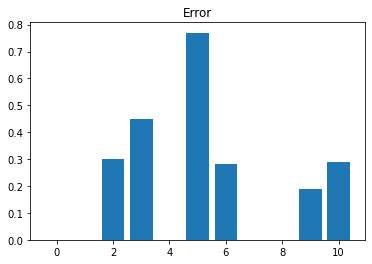

In [10]:
# inputs with noise

X = input_with_noise(X)
accuracys = [] #Miss-matching error
testing_size = 100
i = 1
while i < 102:
    # Generate training data
    # Numbers of examples in training set
    X,y = generate_data_Xor(N = 1000,Best_data = False)
    X = input_with_noise(X)
    
    # Training:
    max_iters = 10000
    W1,W2,b1,b2,c = NN(X,y,number_of_input_nodes=2,number_of_hidden_nodes=2,number_of_output_nodes=1,max_iters=max_iters)
    
    accuracys.append(testing(testing_size,W1,W2,b1,b2)/100)
    i += 10
    
p = [0,1,2,3,4,5,6,7,8,9,10]
plt.bar(p,accuracys)
plt.title("Error")

In [11]:
# AND

def generate_data_And(N ,Best_data = False):
    X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
    Y = np.array([[0, 0, 0, 1]]) 
    
    if Best_data:
        idx = np.arange(N)%4
    else:
        idx = np.random.randint(4, size=N)
    return X.T[idx,:].T,Y[0][idx]

Text(0.5, 1.0, 'Cost Function')

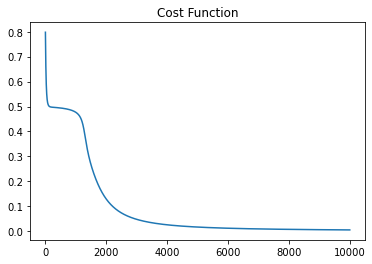

In [12]:

# Set Layer structure
number_of_input_nodes = 2
number_of_hidden_nodes = 2
number_of_output_nodes = 1

# Generate training data
# Numbers of examples in training set
X,y = generate_data_And(N = 5,Best_data = True)

# Training:
max_iters = 10000
W1,W2,b1,b2,c = NN(X,y,number_of_input_nodes=2,number_of_hidden_nodes=2,number_of_output_nodes=1,max_iters=max_iters)
x = []
for i in range(max_iters):
    x.append(i)
plt.plot(x,c)
plt.title("Cost Function")

Text(0.5, 1.0, 'Error')

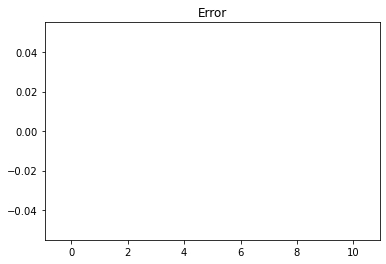

In [13]:
def testing(number_of_samples,W1,W2,b1,b2):
    test_set,test_labels = generate_data_And(number_of_samples,Best_data=False)
    a0,a1,a2 = feedforward(test_set,W1,W2,b1,b2)
    count = 0
    for i in range(a2.size):
        if a2[0][i] > 0.5 and test_labels[i] == 0:
            count += 1
        if a2[0][i] <= 0.5 and test_labels[i] == 1:
            count += 1
    return count

accuracys = [] #Miss matching error
testing_size = 100
i = 1
while i < 102:
    # Generate training data
    # Numbers of examples in training set
    X,y = generate_data_And(N = 1000,Best_data = False)

    # Training:
    max_iters = 10000
    W1,W2,b1,b2,c = NN(X,y,number_of_input_nodes=2,number_of_hidden_nodes=2,number_of_output_nodes=1,max_iters=max_iters)
    
    accuracys.append(testing(testing_size,W1,W2,b1,b2)/100)
    i += 10
    
p = [0,1,2,3,4,5,6,7,8,9,10]
plt.bar(p,accuracys)
plt.title("Error")

# if graph is empty then error is zero

Text(0.5, 1.0, 'Error')

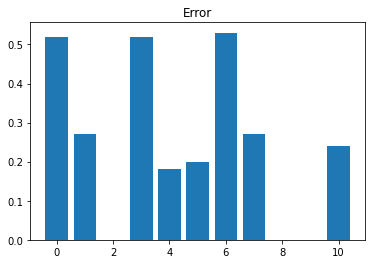

In [14]:
# input with noise

accuracys = [] #Miss matching error
testing_size = 100
i = 1
while i < 102:
    # Generate training data
    # Numbers of examples in training set
    X,y = generate_data_And(N = 1000,Best_data = False)
    X = input_with_noise(X)
    
    # Training:
    max_iters = 20000
    W1,W2,b1,b2,c = NN(X,y,number_of_input_nodes=2,number_of_hidden_nodes=2,number_of_output_nodes=1,max_iters=max_iters)
    
    accuracys.append(testing(testing_size,W1,W2,b1,b2)/100)
    i += 10
    
p = [0,1,2,3,4,5,6,7,8,9,10]
plt.bar(p,accuracys)
plt.title("Error")

In [15]:
# Or

def generate_data_Or(N ,Best_data = False):
    X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
    Y = np.array([[0, 1, 1, 1]]) 
    
    if Best_data:
        idx = np.arange(N)%4
    else:
        idx = np.random.randint(4, size=N)
    return X.T[idx,:].T,Y[0][idx]


Text(0.5, 1.0, 'Cost Function')

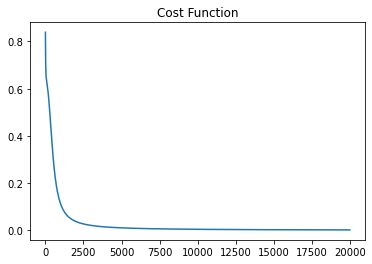

In [16]:
# Set Layer structure
number_of_input_nodes = 2
number_of_hidden_nodes = 2
number_of_output_nodes = 1

# Generate training data
# Numbers of examples in training set
X,y = generate_data_Or(N = 5,Best_data = True)

# Training:
max_iters = 20000
W1,W2,b1,b2,c = NN(X,y,number_of_input_nodes=2,number_of_hidden_nodes=2,number_of_output_nodes=1,max_iters=max_iters)
x = []
for i in range(max_iters):
    x.append(i)
plt.plot(x,c)
plt.title("Cost Function")

Text(0.5, 1.0, 'Error')

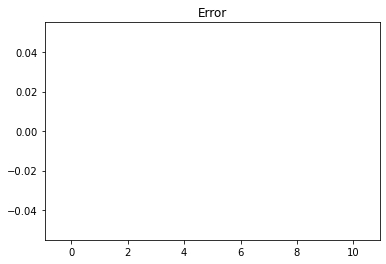

In [17]:
def testing(number_of_samples,W1,W2,b1,b2):
    test_set,test_labels = generate_data_Or(number_of_samples,Best_data=False)
    a0,a1,a2 = feedforward(test_set,W1,W2,b1,b2)
    count = 0
    for i in range(a2.size):
        if a2[0][i] > 0.5 and test_labels[i] == 0:
            count += 1
        if a2[0][i] <= 0.5 and test_labels[i] == 1:
            count += 1
    return count

accuracys = [] #Miss matching error
testing_size = 100
i = 1
while i < 102:
    # Generate training data
    # Numbers of examples in training set
    X,y = generate_data_Or(N = 1000,Best_data = False)

    # Training:
    max_iters = 20000
    W1,W2,b1,b2,c = NN(X,y,number_of_input_nodes=2,number_of_hidden_nodes=2,number_of_output_nodes=1,max_iters=max_iters)
    
    accuracys.append(testing(testing_size,W1,W2,b1,b2)/100)
    i += 10
    
p = [0,1,2,3,4,5,6,7,8,9,10]
plt.bar(p,accuracys)
plt.title("Error")

# if graph is empty then error is zero

Text(0.5, 1.0, 'Error')

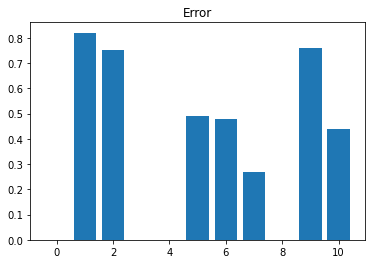

In [18]:
accuracys = [] #Miss matching error
testing_size = 100
i = 1
while i < 102:
    # Generate training data
    # Numbers of examples in training set
    X,y = generate_data_Or(N = 1000,Best_data = False)
    X = input_with_noise(X)
    
    # Training:
    max_iters = 20000
    W1,W2,b1,b2,c = NN(X,y,number_of_input_nodes=2,number_of_hidden_nodes=2,number_of_output_nodes=1,max_iters=max_iters)
    
    accuracys.append(testing(testing_size,W1,W2,b1,b2)/100)
    i += 10
    
p = [0,1,2,3,4,5,6,7,8,9,10]
plt.bar(p,accuracys)
plt.title("Error")

In [19]:
# Question-2

number_of_train_samples = 50

### Run below cell and skip next cell if 'train-images-idx3-ubyte' is not available

In [42]:

### Loading data using Tensorflow
mnist = input_data.read_data_sets('MNIST_data')
X = mnist.train.next_batch(batch_size=number_of_train_samples)[0].T
y = mnist.train.next_batch(batch_size=number_of_train_samples)[1]

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


### Run this if 'train-images-idx3-ubyte' (downloaded from given link) is available

In [21]:

## Run this if 'train-images-idx3-ubyte' (downloaded from given link) is available

# def read_idx(filename):
#     with open(filename, 'rb') as f:
#         zero, data_type, dims = struct.unpack('>HBB', f.read(4))
#         shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
#         return np.fromstring(f.read(), dtype=np.uint8).reshape(shape)

# train_images = read_idx('train-images-idx3-ubyte')
# train_labels = read_idx('train-labels-idx1-ubyte')


# def get_data(num_of_samples,train_images,train_labels,sampled_size = 28):
#     dataset = np.zeros((sampled_size*sampled_size,num_of_samples))
#     label_dataset = np.zeros(num_of_samples)
    
#     for i in range(num_of_samples):
#         dataset[:,i] = train_images[i].flatten()
#         label_dataset[i] = train_labels[i]
        
#     return dataset,label_dataset

# # Getting data and Normalising
# X,y = get_data(number_of_train_samples,train_images,train_labels)
# X = X/255

In [22]:
# Neural Net-structure

## Keeping more hidden layers is helping to get images Good
# Tune number_of_hidden_nodes here
number_of_input_nodes = X.shape[0]
number_of_hidden_nodes = 600
number_of_output_nodes = X.shape[0]

### Using same feedforward for forward propagation(from Q1) and doing different backpropagation and using different cost calculation(since these are different)

In [23]:
def backprop(X,output_layer_difference,KL_divergence_grad,output_layer_activation,hidden_layer_activation,W1,W2,lamda):
    
    delta_outer = np.multiply(output_layer_difference,np.multiply(output_layer_activation,1-output_layer_activation))
    delta_hidden = np.multiply(np.dot(np.transpose(W2),delta_outer) + np.transpose(np.matrix(KL_divergence_grad)),
                               np.multiply(hidden_layer_activation,1-hidden_layer_activation))


    W1_grad = np.dot(delta_hidden,np.transpose(X))
    W2_grad = np.dot(delta_outer,np.transpose(hidden_layer_activation))
    b1_grad = np.sum(delta_hidden,axis = 1)
    b2_grad = np.sum(delta_outer,axis = 1).reshape(delta_outer.shape[0],1)
    
    W1_grad = W1_grad / X.shape[1] + lamda * W1
    W2_grad = W2_grad / X.shape[1] + lamda * W2
    b1_grad = b1_grad / X.shape[1]
    b2_grad = b2_grad / X.shape[1]

    W1_grad = np.array(W1_grad)
    W2_grad = np.array(W2_grad)
    b1_grad = np.array(b1_grad)
    b2_grad = np.array(b2_grad)
    
    return W1_grad,W2_grad,b1_grad,b2_grad
    

## Tune Learning rate,, lamda: weight decay coeffient,, beta:sparsity constant,, rho:probability.
def Sparse_autoencoder(X,number_of_input_nodes,number_of_hidden_nodes,max_iters = 5000):
    W1 = np.random.normal(0,1,size=(number_of_hidden_nodes,number_of_input_nodes))
    W2 = np.random.normal(0,1,size=(number_of_input_nodes,number_of_hidden_nodes))
    b1 = np.random.normal(0,1,size=(number_of_hidden_nodes,1))
    b2 = np.random.normal(0,1,size=(number_of_input_nodes,1))
    
    lamda = 0.1
    beta = 0.01
    rho = 0.1
    learning_rate = 0.01

    cost_list = []
    
    for i in range(max_iters):

        # Forward
#         X = mnist.train.next_batch(number_of_train_samples)[0].T
        _,hidden_layer_activation,output_layer_activation = feedforward(X,W1,W2,b1,b2)


        # Useful values
        output_layer_difference = output_layer_activation - X
        rho_cap = np.sum(hidden_layer_activation,axis = 1)/X.shape[1]
        KL_divergence_grad = beta * (-(rho/rho_cap) + ((1-rho)/(1-rho_cap)))
        
        # Cost 
        MSE = 0.5 * np.sum(np.multiply(output_layer_difference,output_layer_difference))/X.shape[1]
#         epsilon = 1e-10
#         log_loss = -np.sum(X*np.log(output_layer_activation+epsilon)+(1-X)*np.log(1-output_layer_activation+epsilon))/X.shape[1]
        weight_decay = 0.5 * lamda * (np.sum(np.multiply(W1,W1)) + np.sum(np.multiply(W2,W2)))

        # overflow issues
        for j in range(rho_cap.size):
            if rho_cap[j] == 1:
                rho_cap[j] = 0.99
            if rho_cap[j] == 0:
                rho_cap[j] = 0.01
        KL_divergence = beta * np.sum(rho * np.log(rho/rho_cap) + (1-rho) * np.log((1-rho)/(1-rho_cap)))

        cost = MSE + weight_decay + KL_divergence

        # BackProp
        W1_grad,W2_grad,b1_grad,b2_grad = backprop(X,output_layer_difference,KL_divergence_grad,output_layer_activation,hidden_layer_activation,W1,W2,lamda)
        
        # Update

        W1 = W1 - learning_rate * W1_grad
        W2 = W2 - learning_rate * W2_grad
        b1 = b1 - learning_rate * b1_grad
        b2 = b2 - learning_rate * b2_grad
        
        cost_list.append(cost)
        
        if not i%500:
            print("iteration", i,":","cost:",cost)
    return W1,W2,b1,b2,cost_list

In [24]:
# Tune maximum iterations here
W1,W2,b1,b2,c =  Sparse_autoencoder(X,number_of_input_nodes,number_of_hidden_nodes,max_iters=5000)

iteration 0 : cost: 47262.65987333686
iteration 500 : cost: 17385.27365244849
iteration 1000 : cost: 6409.256089613186
iteration 1500 : cost: 2365.022918231669
iteration 2000 : cost: 879.6291667990138
iteration 2500 : cost: 338.18958461559623
iteration 3000 : cost: 140.44422291129501
iteration 3500 : cost: 67.87231003344623
iteration 4000 : cost: 41.1065730265981
iteration 4500 : cost: 31.17164588125014


Text(0.5, 1.0, 'output Image')

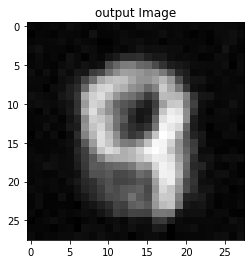

In [47]:
# Testing:

hidden_layer_activation = sigmoid(np.dot(W1,X) + b1)
output_layer_activation = sigmoid(np.dot(W2,hidden_layer_activation) + b2)
plt.imshow(output_layer_activation[:,1].reshape(28,28),cmap = 'gray')
plt.title("output Image")

Text(0.5, 1.0, 'Original Image')

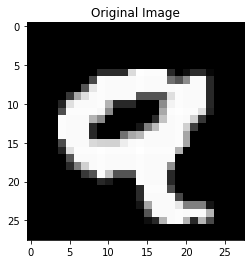

In [48]:
plt.imshow(X[:,1].reshape(28,28),cmap = 'gray')
plt.title("Original Image")

## Question 3

In [27]:
## NOTE:

# In this Question better to choose dataset from tensorflow because optimizing on same batch is
# not giving good results(from previous question) and
# i got to know that if we train with many batches we will get good results as below even without downsampling and
#Implemtation is becoming slighty easy and also normalising is done very well.

In [28]:
mnist = input_data.read_data_sets('MNIST_data')

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [29]:
# Function to downscale dataset
def downscale(X,number_of_training_samples):
    dataset = np.zeros((number_of_training_samples,196))
    for i in range(X[0].shape[0]):
        A = X[0][i,:].reshape(28,28)
        dataset[i,:] = downscale_local_mean(A,(2,2)).reshape(-1)
    
    A = []
    A.append(dataset)
    A.append(X[1])
    return A

#### If we want to use total image ie. 28 x 28 uncomment this and comment below cell and Run

In [30]:
# number_sample = mnist.train.num_examples
# input_dim = 784 #28^2

In [31]:
# If we want to use total image ie. 14 x 14
number_sample = mnist.train.num_examples
input_dim = 196

In [32]:
class VariationalAutoEncoder(object):
    def __init__(self,learning_rate=1e-4,batch_size=100,n_z=5):
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.n_z = n_z
        
        #build a network
        self.build()
        #launch a session
        self.sess = tf.Session()
        self.sess.run(tf.global_variables_initializer())
        
    #building a network
    def build(self):
        #input
        self.x = tf.placeholder(name='x',dtype=tf.float32,shape=[None,input_dim])  #shape=(batch_size,input_dim)

        ### After Testing with varies neural-net structures i ended with below architecture
        #encoder
        f1 = fc(self.x,512,activation_fn=tf.nn.relu)
        f2 = fc(f1,384,activation_fn=tf.nn.relu)  
        f3 = fc(f2,256,activation_fn=tf.nn.relu)  
        
        self.z_mu = fc(f3,self.n_z,activation_fn=None)
        self.sigma_z_sq = fc(f3,self.n_z,activation_fn=None)
        # let Here sigma_z_sq be log of sigma^2

        # Reparametrization (eps)
        #N(z_mu,z_sigma)
        eps = tf.random_normal(shape=tf.shape(self.sigma_z_sq),mean=0,stddev=1,dtype=tf.float32)
        self.z = self.z_mu + tf.sqrt(tf.exp(self.sigma_z_sq)) * eps

        #decoder
        g1 = fc(self.z,256,activation_fn=tf.nn.relu)
        g2 = fc(g1,384,activation_fn=tf.nn.relu)
        g3 = fc(g2,512,activation_fn=tf.nn.relu)
        
        self.x_hat = fc(g3,input_dim,activation_fn=tf.sigmoid)
        
        #Cost(Mis-matching or Log-Loss)
        # From previous question experience i am choose Log-loss between x,x_hat instead of MSE
        epsilon = 1e-10
        classify_loss = -tf.reduce_sum(self.x*tf.log(self.x_hat+epsilon)+(1-self.x)*tf.log(1-self.x_hat+epsilon),axis=1)
        
        # Our Cost Function 
        latent_loss = -0.5*tf.reduce_sum(1+self.sigma_z_sq-tf.square(self.z_mu)- tf.exp(self.sigma_z_sq),axis=1)
        
        #Total loss
        self.loss = tf.reduce_mean(classify_loss+latent_loss)
        
        #optimiser
        self.train_op = tf.train.AdamOptimizer(learning_rate=self.learning_rate).minimize(self.loss)
        

    # Doing single forward and backward pass to get loss    
    def run_single_step(self,x):
#         print(x.shape)
        _, loss = self.sess.run([self.train_op,self.loss], feed_dict={self.x: x})
        return loss
        
    # For Getting input Samples:
    def output(self,x):
        return self.sess.run(self.x_hat , feed_dict={self.x: x})
        
    # For Generating New Samples:
    def generate(self,z):
        return self.sess.run(self.x_hat,feed_dict={self.z: z})


### Tune epoch here:

In [33]:
def get_model_trained(learning_rate=1e-4,batch_size=100,epoch=15,n_z=10):
    
    model = VariationalAutoEncoder(learning_rate=learning_rate,batch_size=batch_size,n_z=n_z)
    
    #training loop
    for ep in range(epoch):
        for iter in range(number_sample // batch_size):
            
            # If we dont want downsampling comment below line and uncomment the next line
            batch = downscale(mnist.train.next_batch(batch_size),batch_size)
#             batch = mnist.train.next_batch(batch_size)
            
            #Doing forward and backward pass (training)
            #print(batch[0].shape)
            loss = model.run_single_step(batch[0])
        print('[Epoch {}] Loss: {}'.format(ep,loss))
    print('Done!')
    return model

### Tune Learning Rate, latent dimension,batch size here:

In [34]:
tf.reset_default_graph()
model = get_model_trained(learning_rate=1e-4,batch_size=100,n_z=2)

[Epoch 0] Loss: 53.634735107421875
[Epoch 1] Loss: 49.34687805175781
[Epoch 2] Loss: 48.119606018066406
[Epoch 3] Loss: 44.360137939453125
[Epoch 4] Loss: 44.79725646972656
[Epoch 5] Loss: 44.28864669799805
[Epoch 6] Loss: 44.483280181884766
[Epoch 7] Loss: 46.01020431518555
[Epoch 8] Loss: 44.26508331298828
[Epoch 9] Loss: 44.11685562133789
[Epoch 10] Loss: 43.998558044433594
[Epoch 11] Loss: 44.2008056640625
[Epoch 12] Loss: 44.84012222290039
[Epoch 13] Loss: 43.63882827758789
[Epoch 14] Loss: 44.198116302490234
Done!


Original Number: 3


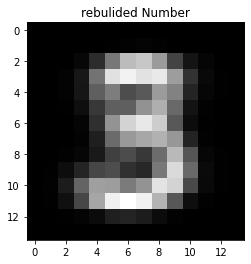

In [37]:
# rebuliding
batch_size = 10
batch = downscale(mnist.train.next_batch(batch_size),batch_size)
x_rebulided = model.output(batch[0])

plt.imshow(x_rebulided[2,:].reshape(14,14),cmap = 'gray')
plt.title("rebulided Number")
print("Original Number:",batch[1][1])

Text(0.5, 1.0, 'New data')

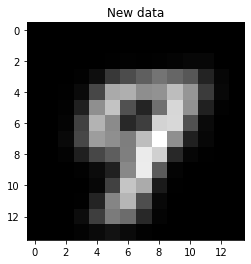

In [38]:
# Testing
z = np.random.normal(size=[model.batch_size, model.n_z])
x_generated = model.generate(z)

plt.imshow(x_generated[3,:].reshape(14,14),cmap = 'gray')
plt.title("New data")